# Data Mining in Physics - Presentation 2. - Braun 5.2: Generation of pseudorandom numbers

In [35]:
library(microbenchmark)
library(graphics)

In [36]:
options(jupyter.plot_scale=1.4)

## Different types of uniform RNGs in R

The most common ones are multiplicative congruential RNGs, which are able to generate random numbers $u_{0}$, $u_{1}$, $u_{2}$, etc. which seems uniform and completely random to an outside observer. In reality they're finitely cyclic and also competely predictable if the observer knows the parameters and initial condition of the RNG. These type of RNGs create random numbers by using the following simple interative method:

$$
x_{n} = b x_{n-1}\ \left( \mathrm{mod}\,m \right)
$$
$$
u_{n} = \frac{x_{n}}{m}
$$

Where $x_{n}$ is some form of "seed value", while $b$ and $m$ are parameters, which determine the length of the cycle, after the numbers repeat again.

In [37]:
mcrng <- function(x_n, b, m) {
    
    x_n = (b * x_n) %% m
    u_n = x_n / m
    
    return(c(x_n, u_n))
}

### 1.) Trash hand-made RNG

In [163]:
# Create container for the N generated random numbers
N = 100
rn = numeric(N)
# Set starting seed `x_n` for the RNG
x_n = 2
# Configure other parameters of the RNG
b = 9
m = 15

# Generate N random numbers by iterating the RNG
for (i in 1:N) {
    xn_un = mcrng(x_n, b, m)
    
    # Update the seed and save generated random number
    x_n = xn_un[1]
    rn[i] = xn_un[2]
}

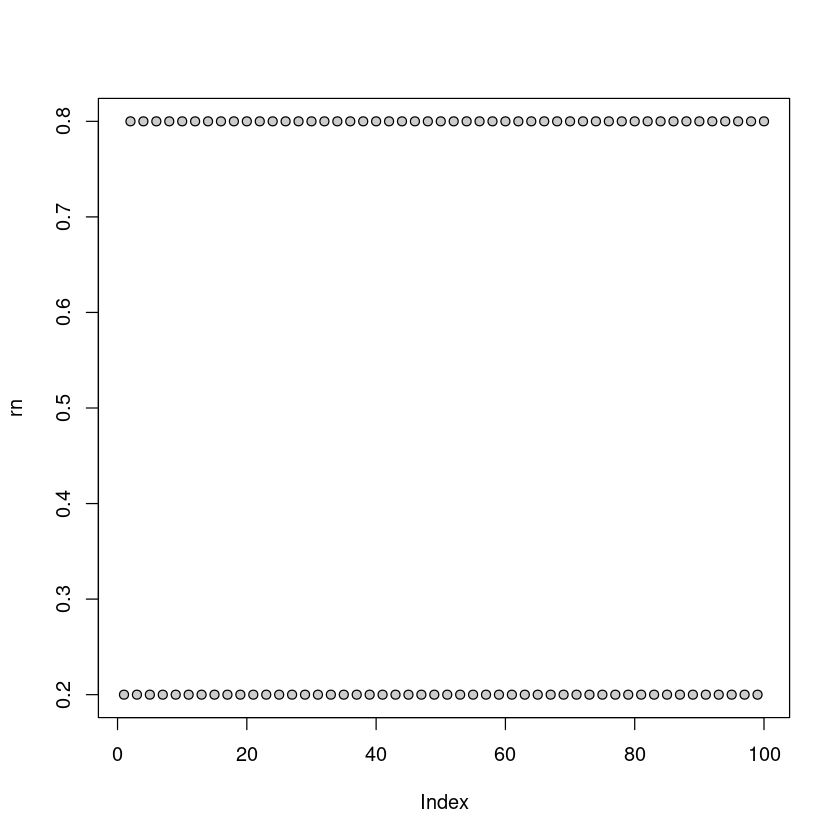

In [164]:
plot(rn, type='n')
points(rn,
       bg=gray(0.8), pch=21)

### 2.) Somewhat better hand-made RNG

In [165]:
# Create container for the N generated random numbers
N = 2000
rn = numeric(N)
# Set starting seed `x_n` for the RNG
x_n = 51351
# Configure other parameters of the RNG
b = 171
m = 30269

# Generate N random numbers by iterating the RNG
for (i in 1:N) {
    xn_un = mcrng(x_n, b, m)
    
    # Update the seed and save generated random number
    x_n = xn_un[1]
    rn[i] = xn_un[2]
}

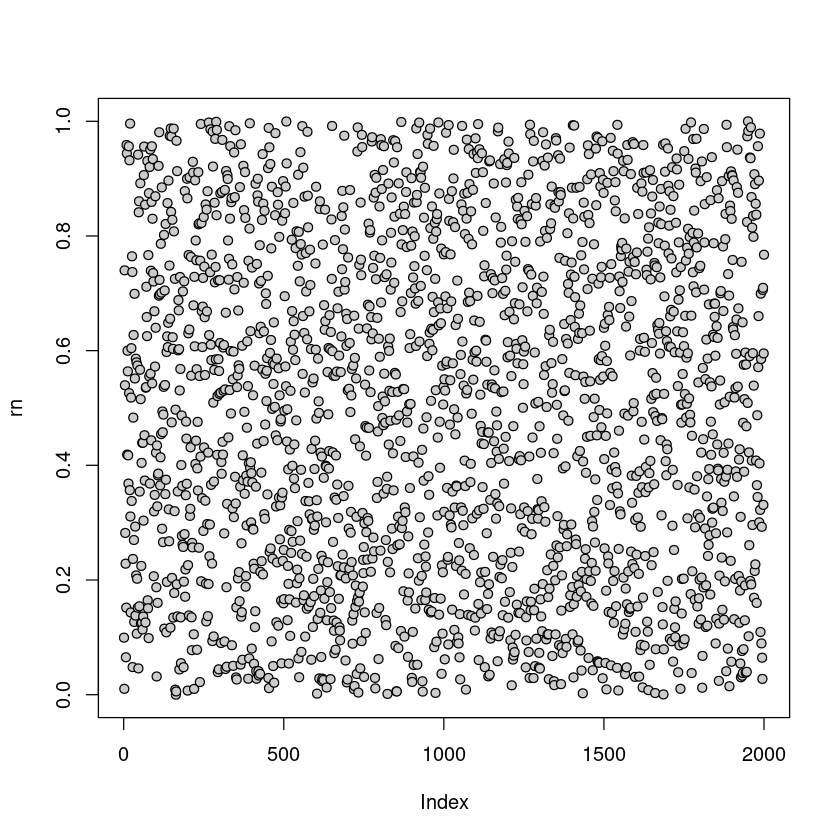

In [166]:
plot(rn, type='n')
points(rn,
       bg=gray(0.8), pch=21)

### 3.) Superior built-in RNG

`runif` : "random uniform"

In [167]:
rn = runif(N)

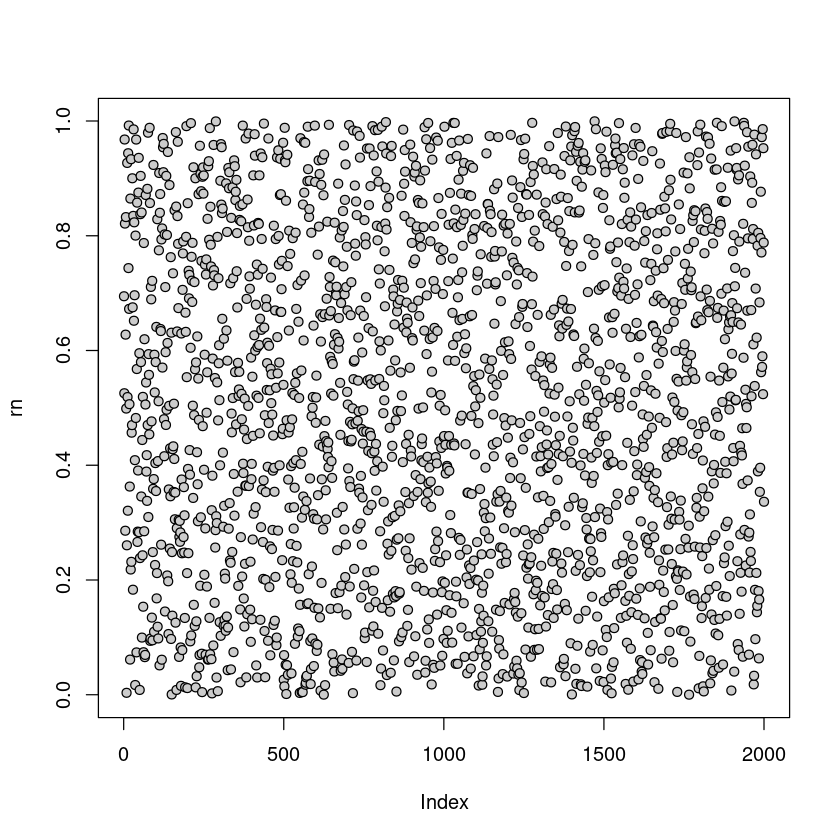

In [168]:
plot(rn, type='n')
points(rn,
       bg=gray(0.8), pch=21)

## Marsaglia effect

### 1.) Built-in `runif()`

In [171]:
coords = function(N, D=3) {
    
    c = replicate(n=N, exp=runif(D))
    
    return(c)
}

In [172]:
c = coords(1000)
x = c[1,]
y = c[2,]
z = c[3,]

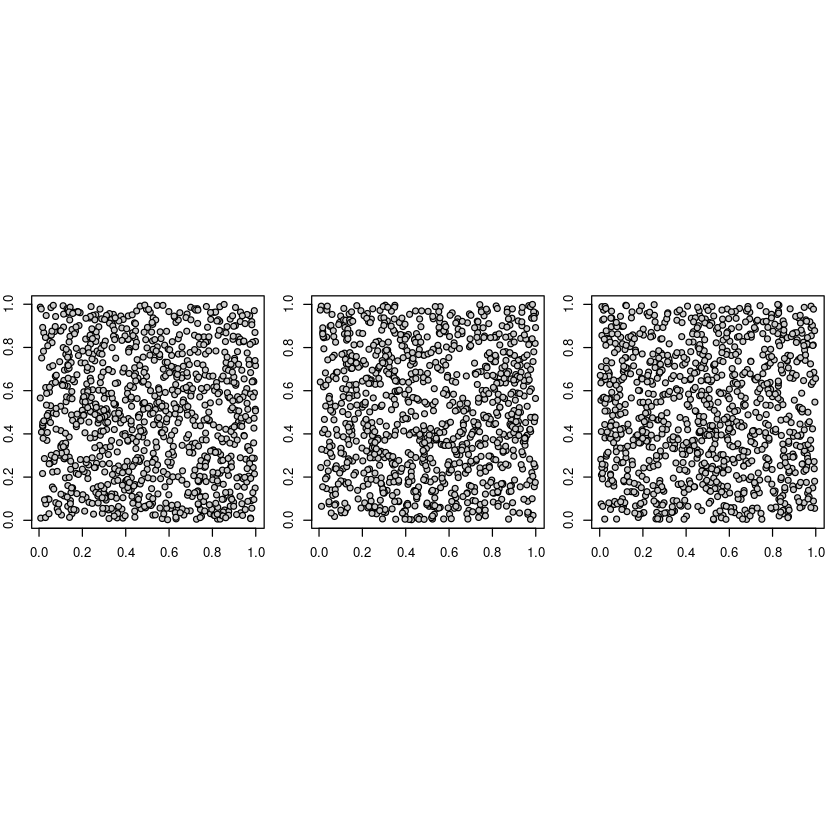

In [174]:
options(jupyter.plot_scale=0.8)
layout(matrix(1:3, 1, 3, byrow = TRUE), respect = TRUE)
par(omi=c(0,0,0,0), mar=c(2, 2, 1, 1))

plot(x, y, type='n')
points(x, y,
       bg=gray(0.8), pch=21)

plot(x, z, type='n')
points(x, z,
       bg=gray(0.8), pch=21)

plot(y, z, type='n')
points(y, z,
       bg=gray(0.8), pch=21)

# Restore
par = par()
options(jupyter.plot_scale=1.4)

### 2.) Worse hand-made RNG

In [175]:
# Create container for the N generated random numbers
N = 3000
rn = numeric(N)
# Set starting seed `x_n` for the RNG
x_n = 51351
# Configure other parameters of the RNG
b = 171
m = 30269

# Generate N random numbers by iterating the RNG
for (i in 1:N) {
    xn_un = mcrng(x_n, b, m)
    
    # Update the seed and save generated random number
    x_n = xn_un[1]
    rn[i] = xn_un[2]
}

In [176]:
x = rn[1:(N/3)]
y = rn[(N/3+1):(2*N/3)]
z = rn[(2*N/3+1):N]

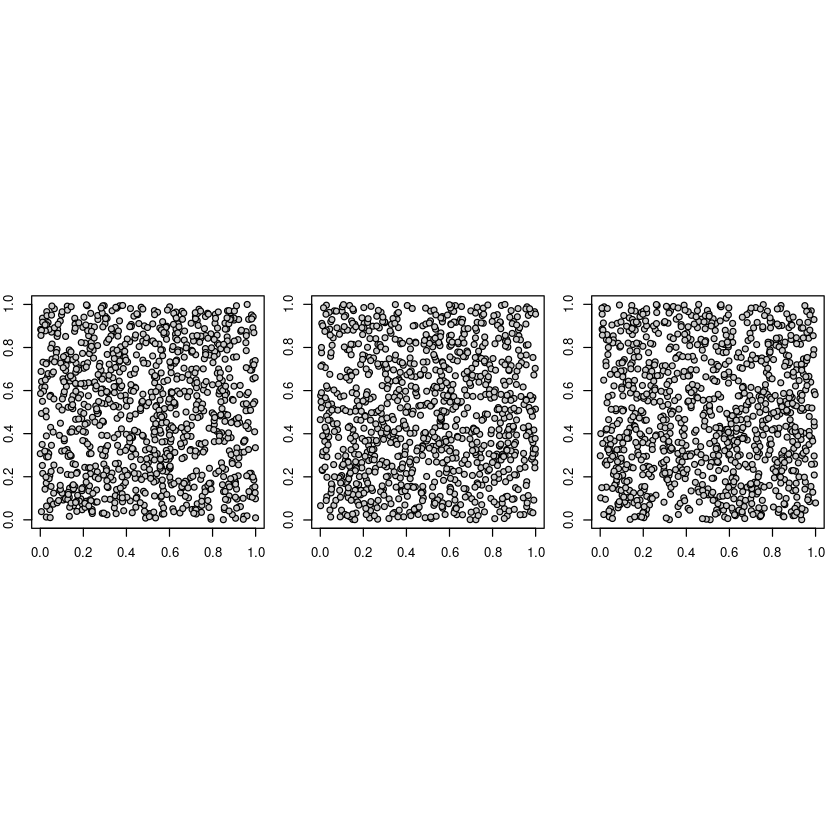

In [177]:
options(jupyter.plot_scale=0.8)
layout(matrix(1:3, 1, 3, byrow = TRUE), respect = TRUE)
par(omi=c(0,0,0,0), mar=c(2, 2, 1, 1))

plot(x, y, type='n')
points(x, y,
       bg=gray(0.8), pch=21)
title(xlab="x", ylab="y")

plot(x, z, type='n')
points(x, z,
       bg=gray(0.8), pch=21)

plot(y, z, type='n')
points(y, z,
       bg=gray(0.8), pch=21)

# Restore
par = par()
options(jupyter.plot_scale=1.4)

### 2.) Even worse hand-made RNG

In [157]:
# Create container for the N generated random numbers
N = 3000
rn = numeric(N)
# Set starting seed `x_n` for the RNG
x_n = 1229
# Configure other parameters of the RNG
b = 983
m = 2048

# Generate N random numbers by iterating the RNG
for (i in 1:N) {
    xn_un = mcrng(x_n, b, m)
    
    # Update the seed and save generated random number
    x_n = xn_un[1]
    rn[i] = xn_un[2]
}

In [158]:
x = rn[1:(N/3)]
y = rn[(N/3+1):(2*N/3)]
z = rn[(2*N/3+1):N]

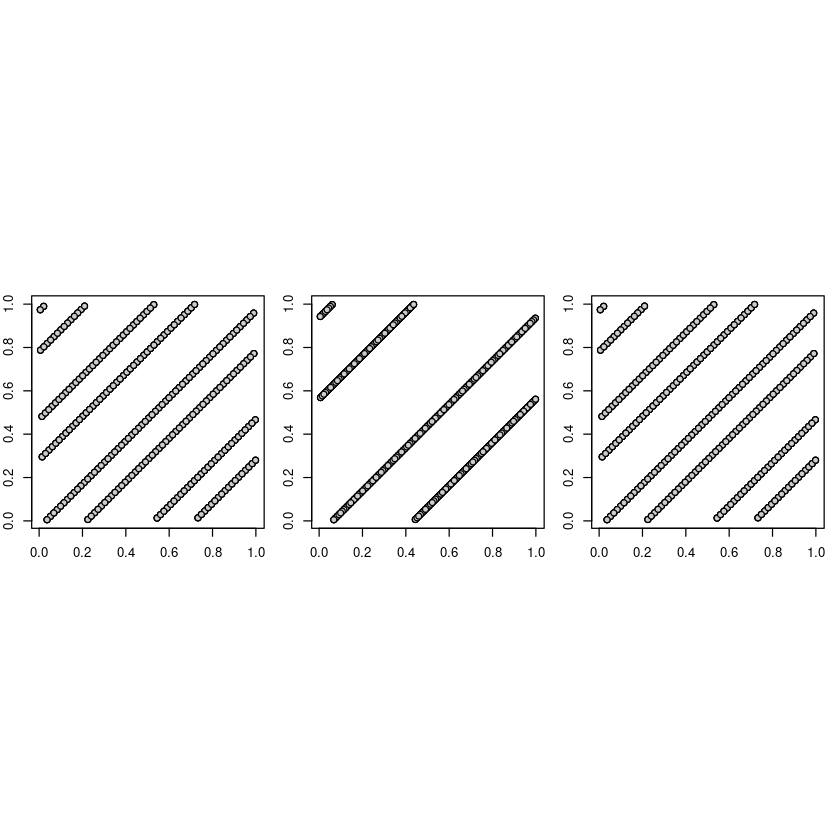

In [159]:
options(jupyter.plot_scale=0.8)
layout(matrix(1:3, 1, 3, byrow = TRUE), respect = TRUE)
par(omi=c(0,0,0,0), mar=c(2, 2, 1, 1))

plot(x, y, type='n')
points(x, y,
       bg=gray(0.8), pch=21)
title(xlab="x", ylab="y")

plot(x, z, type='n')
points(x, z,
       bg=gray(0.8), pch=21)

plot(y, z, type='n')
points(y, z,
       bg=gray(0.8), pch=21)

# Restore
par = par()
options(jupyter.plot_scale=1.4)